# Analisis de las precipitaciones en municipios de cundinamarca

In [98]:
import pandas as pd

# Cargamos la data
path = r'Precipitaciones_Totales_Mensuales_20240703.csv'
df = pd.read_csv(path)

# Mostramos las primeras 5 columnas
df.head()

,ESTACIÓN,CÓDIGO,X=N,Y=E,MUNICIPIO,CUENCA,AÑO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,190.0,153.6,76.2
1,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1996,295.9,127.2,247.5,149.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.2
2,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1997,294.2,76.9,160.2,296.3,144.1,134.3,20.1,3.6,75.3,174.0,182.0,110.1
3,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1998,144.3,118.0,209.1,438.3,292.6,30.6,35.2,30.7,103.2,385.9,105.4,235.7
4,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1999,78.3,256.6,83.0,339.3,108.2,236.2,17.6,23.7,322.9,337.9,234.4,199.5


In [99]:
#Resumen de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6196 entries, 0 to 6195
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESTACIÓN    6196 non-null   object 
 1   CÓDIGO      6196 non-null   int64  
 2   X=N         6196 non-null   int64  
 3   Y=E         6196 non-null   int64  
 4   MUNICIPIO   6196 non-null   object 
 5   CUENCA      6196 non-null   object 
 6   AÑO         6196 non-null   int64  
 7   ENERO       6196 non-null   float64
 8   FEBRERO     6196 non-null   float64
 9   MARZO       6196 non-null   float64
 10  ABRIL       6196 non-null   float64
 11  MAYO        6196 non-null   float64
 12  JUNIO       6195 non-null   float64
 13  JULIO       6196 non-null   float64
 14  AGOSTO      6196 non-null   float64
 15  SEPTIEMBRE  6196 non-null   float64
 16  OCTUBRE     6196 non-null   float64
 17  NOVIEMBRE   6196 non-null   float64
 18  DICIEMBRE   6196 non-null   float64
dtypes: float64(12), int64(4), o

Recopilar y limpiar los datos, abordando problemas de calidad, valores faltantes y posibles sesgos.

Protocolos de limpieza de datos: 

1)Establecer procedimientos para abordar problemas comunes como valores atípicos, errores de entrada y datos faltantes.

2)Validación de datos: Implementar controles de calidad para verificar la precisión y la integridad de los datos recopilados.

3)Documentación de procesos: Registrar todas las acciones realizadas durante el proceso de limpieza de datos para garantizar la reproducibilidad y la transparencia.

**Renombre de columnas**

In [100]:
#renombre de columnas con acentos para mejor manejo de los datos
df.rename(columns={'ESTACIÓN': 'ESTACION', 'CÓDIGO': 'CODIGO' }, inplace=True)
df.head()

,ESTACION,CODIGO,X=N,Y=E,MUNICIPIO,CUENCA,AÑO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,190.0,153.6,76.2
1,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1996,295.9,127.2,247.5,149.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.2
2,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1997,294.2,76.9,160.2,296.3,144.1,134.3,20.1,3.6,75.3,174.0,182.0,110.1
3,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1998,144.3,118.0,209.1,438.3,292.6,30.6,35.2,30.7,103.2,385.9,105.4,235.7
4,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1999,78.3,256.6,83.0,339.3,108.2,236.2,17.6,23.7,322.9,337.9,234.4,199.5


**Manejo de valores nulos**

In [101]:
#manejo de valores nulos
df.isnull().sum()


ESTACION      0
CODIGO        0
X=N           0
Y=E           0
MUNICIPIO     0
CUENCA        0
AÑO           0
ENERO         0
FEBRERO       0
MARZO         0
ABRIL         0
MAYO          0
JUNIO         1
JULIO         0
AGOSTO        0
SEPTIEMBRE    0
OCTUBRE       0
NOVIEMBRE     0
DICIEMBRE     0
dtype: int64

In [102]:
#encontramos el valor nulo en la columna JUNIO
valornulo = df[df['JUNIO'].isnull()].index[0]
print(valornulo)
df.iloc[valornulo]

798


ESTACION       La Primavera
CODIGO              2120557
X=N                 1029900
Y=E                  985090
MUNICIPIO        Subachoque
CUENCA        R. Subachoque
AÑO                    2019
ENERO                   7.1
FEBRERO                57.1
MARZO                 128.4
ABRIL                  69.6
MAYO                  118.2
JUNIO                   NaN
JULIO                   0.0
AGOSTO                  0.0
SEPTIEMBRE              0.0
OCTUBRE                 0.0
NOVIEMBRE               0.0
DICIEMBRE               0.0
Name: 798, dtype: object

In [103]:
#eliminamos la fila con valores nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6195 entries, 0 to 6195
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESTACION    6195 non-null   object 
 1   CODIGO      6195 non-null   int64  
 2   X=N         6195 non-null   int64  
 3   Y=E         6195 non-null   int64  
 4   MUNICIPIO   6195 non-null   object 
 5   CUENCA      6195 non-null   object 
 6   AÑO         6195 non-null   int64  
 7   ENERO       6195 non-null   float64
 8   FEBRERO     6195 non-null   float64
 9   MARZO       6195 non-null   float64
 10  ABRIL       6195 non-null   float64
 11  MAYO        6195 non-null   float64
 12  JUNIO       6195 non-null   float64
 13  JULIO       6195 non-null   float64
 14  AGOSTO      6195 non-null   float64
 15  SEPTIEMBRE  6195 non-null   float64
 16  OCTUBRE     6195 non-null   float64
 17  NOVIEMBRE   6195 non-null   float64
 18  DICIEMBRE   6195 non-null   float64
dtypes: float64(12), int64(4), object

**Análisis de datos duplicados**

In [104]:
#revisión de datos duplicados
duplicados = df.duplicated().sum()
print(f'la cantidad de datos duplicados es: {duplicados}')

la cantidad de datos duplicados es: 0


**Corregir valores atipicos**

In [89]:
#identificamos que las medidas de precipitaciones en el Dataframe no tengan valores negativos
meses = ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
df[df[meses].lt(0).any(axis=1)] #utlizamos lt() que es "menor que"

,ESTACION,CODIGO,X=N,Y=E,MUNICIPIO,CUENCA,AÑO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE


In [90]:
# Aseguramos que todos los valores sean numeros positivos y cambiamos cualquier valor negativo a 0
for month in df.columns[7:18]:
    df.loc[df[month] < 0, month] = 0


Identificando valores atípicos de precipitaciones mensuales, teniendo en cuenta que valores por arriba de los 600 mm/mes son atípicos aunque posibles debido a extremas condiciones ambientales

In [115]:
#identificando valores atipicos de precipitaciones mensuales, teniendo en cuenta que valores por arriba de los 600 mm/mes son atipicos aunque posibles debido a extremas condiciones ambientales
meses = ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
limite_atipico = 600 # en mm
#df[(df['ENERO'] > limite_atipico) | (df['FEBRERO'] > limite_atipico) | (df['MARZO'] > limite_atipico)]
filtro_atipicos = df[df[meses].gt(limite_atipico).any(axis=1)] #usamo la funcion gt que nos aplica el "mayor que" a todas las columnas especificadas en la lista
#filtro_atipicos.reset_index()
print(f'el numero filas con mediciones por arriba de 600 mm/mes son: ',filtro_atipicos.ESTACION.count())


el numero filas con mediciones por arriba de 600 mm/mes son:  22


Análisis de inconsistencias en las coordenadas geográficas de las estaciones

In [92]:
#Verificamos que las estaciones tengan valores consistentes
coordenadas_estacion = df.groupby(['CODIGO', 'ESTACION'])[['X=N', 'Y=E']].nunique()
estacion_inconsistente = coordenadas_estacion[(coordenadas_estacion['X=N'] > 1) | (coordenadas_estacion['Y=E'] > 1)]
print("Estaciones inconsistentes con coordinadas diferentes:")
print(estacion_inconsistente)

Estaciones inconsistentes con coordinadas diferentes:
                   X=N  Y=E
CODIGO  ESTACION           
2401116 Los Pinos    2    2


In [93]:
#se busca la estacion con cordenadas inconsistentes
df[df['CODIGO'] == 2401116].head()

,ESTACION,CODIGO,X=N,Y=E,MUNICIPIO,CUENCA,AÑO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
804,Los Pinos,2401116,1065940,1032940,Suesca,Lag. Suesca,2018,71.0,42.0,81.0,178.0,77.0,90.0,99.0,57.0,17.0,95.0,68.0,2.0
805,Los Pinos,2401116,1065940,1032940,Suesca,Lag. Suesca,2019,16.0,12.0,66.0,79.0,69.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0
1537,Los Pinos,2401116,1000000,1000000,Suesca,Lag. Suesca,2014,26.0,37.0,81.0,41.0,49.0,90.0,80.0,38.0,42.0,63.0,56.2,8.8
3425,Los Pinos,2401116,1000000,1000000,Suesca,Lag. Suesca,2017,41.4,20.7,157.3,57.0,85.0,93.0,58.0,31.0,17.0,66.0,27.0,71.0
3460,Los Pinos,2401116,1000000,1000000,Suesca,Lag. Suesca,2018,71.0,42.0,81.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# creamos una funcion para asegurar que todas las estaciones mantengan las mismas coordenadas
def cordenadas_correctas(df):
    for estacion in df['CODIGO'].unique():
        estacion_data = df[df['CODIGO'] == estacion]
        x_comun = estacion_data['X=N'].mode()[0]
        y_comun = estacion_data['Y=E'].mode()[0]
        df.loc[df['CODIGO'] == estacion, 'X=N'] = x_comun
        df.loc[df['CODIGO'] == estacion, 'Y=E'] = y_comun
    return df

# aplicamos la funcion de correcion de coordenadas
df_corregido = cordenadas_correctas(df)

# verificamos estas correciones
estaciones_corregidas = df_corregido.groupby(['CODIGO', 'ESTACION'])[['X=N', 'Y=E']].nunique()
correcion_de_estaciones = estaciones_corregidas[(estaciones_corregidas['X=N'] > 1) | (estaciones_corregidas['Y=E'] > 1)]
print("Correcion de las estaciones:")
print(correcion_de_estaciones)

Correcion de las estaciones:
Empty DataFrame
Columns: [X=N, Y=E]
Index: []


Exportamos los datos limpios a un archivo .xlsx y a un .csv

In [96]:
df_corregido.to_excel('precipitaciones_limpio.xlsx', sheet_name='limpio', index=False)
df_corregido.to_csv('precipitaciones_limpio.csv')

Exploracion inicial de datos

In [116]:
# Estadística descriptiva
df.describe()
#print(df.describe())

,CODIGO,X=N,Y=E,AÑO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
count,6.195000e+03,6.195000e+03,6.195000e+03,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000
mean,2.259900e+06,1.046287e+06,1.006887e+06,1991.073285,39.422308,52.688313,83.607554,115.186521,100.357094,64.858854,55.399935,51.702873,61.797030,113.513947,105.330880,57.110299
std,2.526988e+05,6.953550e+04,6.844785e+04,18.142979,69.731678,60.034916,67.302192,82.825348,69.879607,52.824729,50.480700,45.240263,49.987278,80.188050,79.898733,54.819798
min,2.119022e+06,0.000000e+00,0.000000e+00,1919.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.120156e+06,1.018200e+06,9.873800e+05,1977.000000,8.600000,19.150000,37.750000,59.300000,53.500000,29.700000,23.000000,22.200000,28.100000,58.500000,52.900000,18.250000
50%,2.120565e+06,1.053180e+06,1.017125e+06,1993.000000,26.100000,40.400000,71.400000,98.800000,90.200000,55.500000,44.200000,42.200000,52.000000,102.000000,91.500000,44.100000
75%,2.401038e+06,1.077060e+06,1.031590e+06,2006.000000,53.400000,71.000000,113.400000,154.500000,134.600000,88.000000,72.700000,69.500000,83.750000,153.350000,140.550000,80.550000
max,3.509510e+06,1.133250e+06,1.134650e+06,2019.000000,3097.000000,2797.000000,1298.000000,828.500000,823.500000,791.000000,550.000000,500.500000,498.600000,675.200000,767.000000,532.300000


In [97]:
#creación de la coloumna "TOTAL_AÑO"
suma_meses = ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']

# Sumar los valores de las columnas especificadas de forma horizontal
df['TOTAL_AÑO'] = df[suma_meses].sum(axis=1).round(2)
df.head()

,ESTACION,CODIGO,X=N,Y=E,MUNICIPIO,CUENCA,AÑO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_AÑO
0,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,190.0,153.6,76.2,451.3
1,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1996,295.9,127.2,247.5,149.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.2,935.0
2,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1997,294.2,76.9,160.2,296.3,144.1,134.3,20.1,3.6,75.3,174.0,182.0,110.1,1671.1
3,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1998,144.3,118.0,209.1,438.3,292.6,30.6,35.2,30.7,103.2,385.9,105.4,235.7,2129.0
4,Pajas Blancas,2119022,973320,944710,Nilo,R. Paguey,1999,78.3,256.6,83.0,339.3,108.2,236.2,17.6,23.7,322.9,337.9,234.4,199.5,2237.6


In [133]:
#filtramos para ver la cantidad de datos desde el año 2000 hasta el 2019
pre_2000 = df[df['AÑO']>= 2000]
print(f'la cantidad de datos desde el 2000 son:',pre_2000['AÑO'].value_counts().sort_index(ascending=False).sum(),'datos')

la cantidad de datos desde el 2000 son: 2312 datos


Visualización del promedio de lluvia anual por municipio en mm

C:\Users\felipe\AppData\Local\Temp\ipykernel_9096\2103505990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_2000['Total'] = pre_2000.iloc[:, 7:19].sum(axis=1)


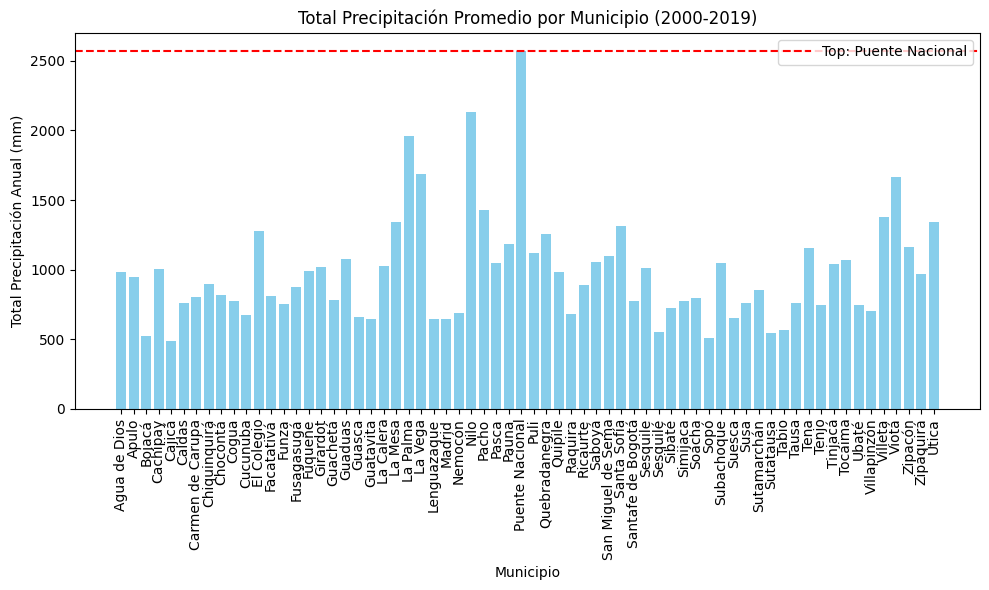

In [148]:
import matplotlib.pyplot as plt

# calculamos la precipitación total en cada uno de los municipios desde el año 2000 hasta el 2019
pre_2000['Total'] = pre_2000.iloc[:, 7:19].sum(axis=1)
precipitacion_municipal = pre_2000.groupby('MUNICIPIO')['Total'].mean().reset_index()

# Encontramos el municipio con el promedio mas alto de precipitaciones anuales
top_Municipio = precipitacion_municipal.loc[precipitacion_municipal['Total'].idxmax()]

# Creamos el grafico de barras
plt.figure(figsize=(10, 6))
plt.bar(precipitacion_municipal['MUNICIPIO'], precipitacion_municipal['Total'], color='skyblue')
plt.xlabel('Municipio')
plt.ylabel('Total Precipitación Anual (mm)')
plt.title('Total Precipitación Promedio por Municipio (2000-2019)')
plt.xticks(rotation=90)
plt.axhline(y=top_Municipio['Total'], color='r', linestyle='--', label=f"Top: {top_Municipio['MUNICIPIO']}")
plt.legend()
plt.tight_layout()
plt.show()